# Tools  preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import xgboost as xgb


In [2]:
Diabetes=pd.read_csv("diabetes_prediction_dataset.csv")
Diabetes.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [3]:
print(Diabetes.duplicated().sum())

3854


In [4]:
Diabetes=Diabetes.drop_duplicates()
Diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [5]:
Diabetes['diabetes'].value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

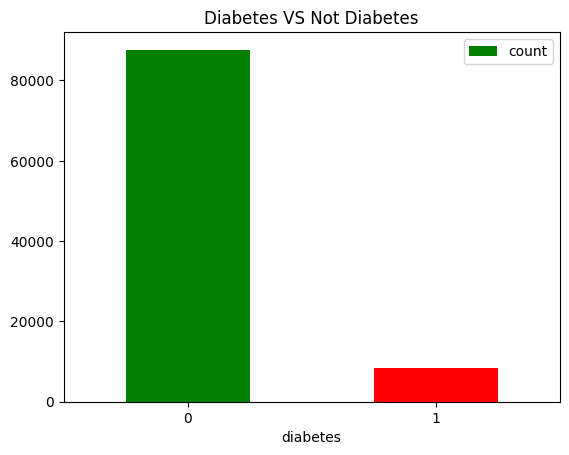

In [6]:
Diabetes['diabetes'].value_counts().plot(kind='bar',color=['green','red'],legend=True);
plt.title("Diabetes VS Not Diabetes")
plt.xticks(rotation=0);


In [7]:
Diabetes.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
Diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
Diabetes['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [10]:
# cross tabe using the comparsion
pd.crosstab(Diabetes.diabetes,Diabetes.gender)

gender,Female,Male,Other
diabetes,,,
0,51714,35932,18
1,4447,4035,0


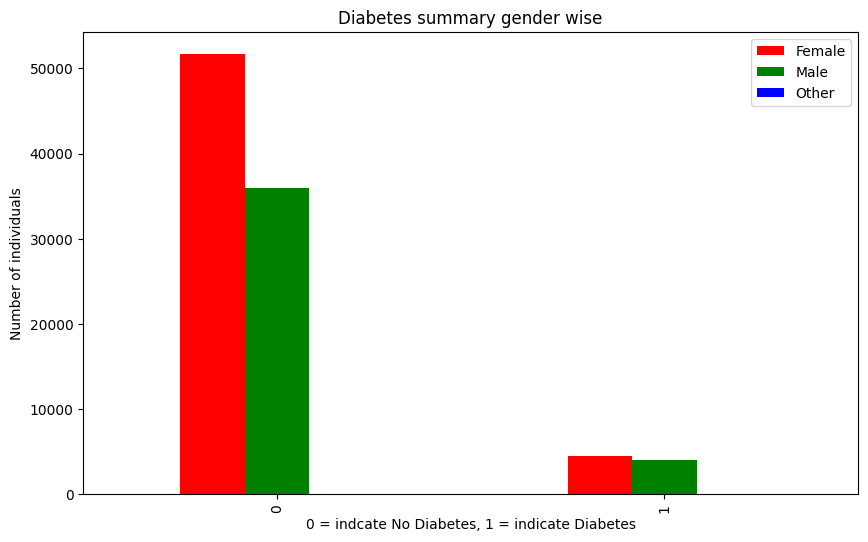

In [11]:
pd.crosstab(Diabetes.diabetes,Diabetes.gender).plot(kind="bar",
                                                    figsize=(10,6),
                                                    color=['red','green','blue'])
plt.title("Diabetes summary gender wise")
plt.xlabel("0 = indcate No Diabetes, 1 = indicate Diabetes")
plt.ylabel("Number of individuals")
plt.legend(['Female','Male','Other']);

plt.savefig('Diabetes.png', bbox_inches='tight', dpi=200)


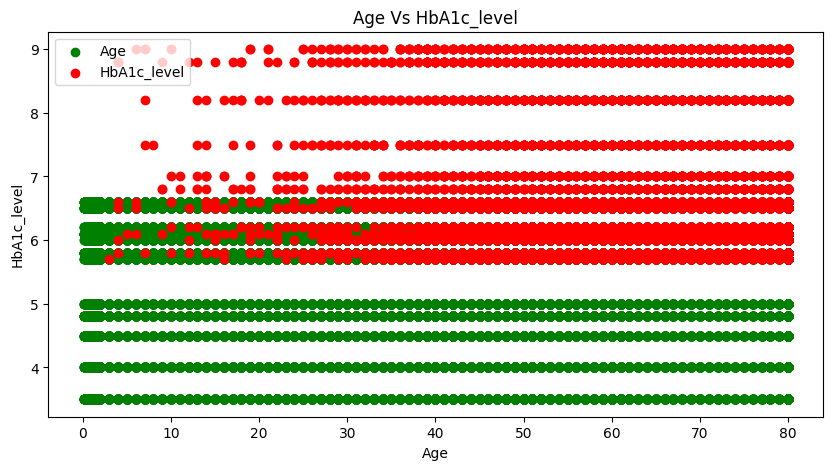

In [12]:
# finding the patterns  using scatter plot
plt.figure(figsize=(10,5))
# create the scatter plot
plt.scatter(Diabetes.age[Diabetes.diabetes==0],Diabetes.HbA1c_level[Diabetes.diabetes==0],c='green');# these is not include in diabetes
plt.scatter(Diabetes.age[Diabetes.diabetes==1],Diabetes.HbA1c_level[Diabetes.diabetes==1],c="red");
plt.title("Age Vs HbA1c_level")
plt.xlabel("Age")
plt.ylabel("HbA1c_level")
plt.legend(["Age","HbA1c_level"]);
plt.savefig('Age Vs HbAIc.png', bbox_inches='tight', dpi=200)


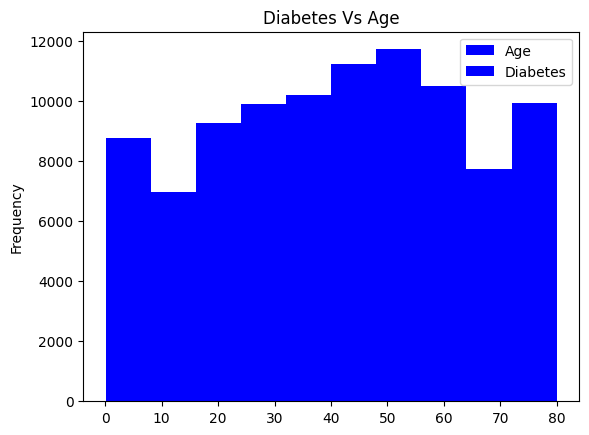

In [13]:
Diabetes['age'].plot(kind='hist',color='blue')
plt.savefig('Diabetes vs age.png', bbox_inches='tight', dpi=200)
plt.title("Diabetes Vs Age")
plt.legend(["Age","Diabetes"])


In [14]:
Diabetes.blood_glucose_level.value_counts

<bound method IndexOpsMixin.value_counts of 0        140
1         80
2        158
3        155
4        155
        ... 
99994    145
99996    100
99997    155
99998    100
99999     90
Name: blood_glucose_level, Length: 96146, dtype: int64>

In [15]:
pd.crosstab(Diabetes.blood_glucose_level,Diabetes.diabetes)
# blood_glucose_level 70 to 100 normal 

diabetes,0,1
blood_glucose_level,,
80,6786,0
85,6632,0
90,6822,0
100,6774,0
126,6785,636
130,6781,690
140,6791,625
145,6709,662
155,6687,598


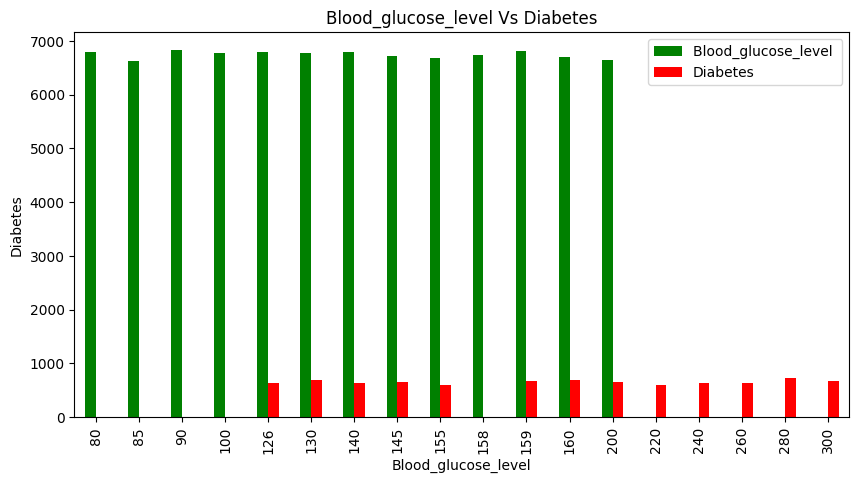

In [16]:
# make bar plot  Blood_glucose_level Vs Diabetes
pd.crosstab(Diabetes.blood_glucose_level,Diabetes.diabetes).plot(kind="bar",
                                                                figsize=(10,5),
                                                                color=["green","red"])
plt.title("Blood_glucose_level Vs Diabetes")
plt.xlabel("Blood_glucose_level")
plt.ylabel("Diabetes")
plt.legend(["Blood_glucose_level ","Diabetes"]);
#People with glucose > 140 mg/dL have a much higher chance of being diabetic.


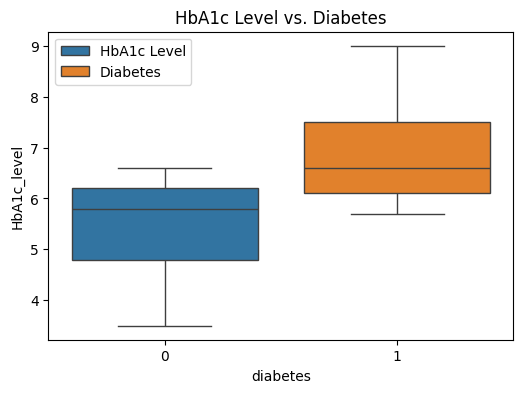

<Figure size 640x480 with 0 Axes>

In [53]:


plt.figure(figsize=(6,4))
sns.boxplot(x="diabetes", y="HbA1c_level",hue="diabetes", data=Diabetes)
plt.title("HbA1c Level vs. Diabetes")
plt.legend(['HbA1c Level','Diabetes'])
plt.show()
plt.savefig('HbI.png', bbox_inches='tight', dpi=200)

#If someone has HbA1c > 6.5, they have a high chance of being diabetic.
#If HbA1c is below 5.7, they are most likely non-diabetic.
#Values between 5.7 - 6.4 might be pre-diabetic


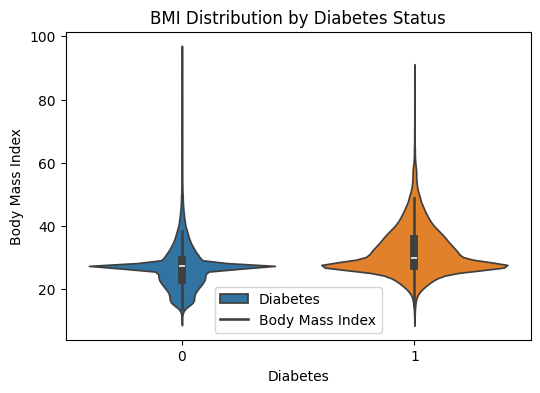

In [52]:
plt.figure(figsize=(6,4))
sns.violinplot(data=Diabetes,hue='diabetes', x='diabetes', y='bmi')
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel("Diabetes")
plt.ylabel("Body Mass Index")
plt.legend(["Diabetes","Body Mass Index"])
plt.savefig('BMI.png', bbox_inches='tight', dpi=200)

plt.show()


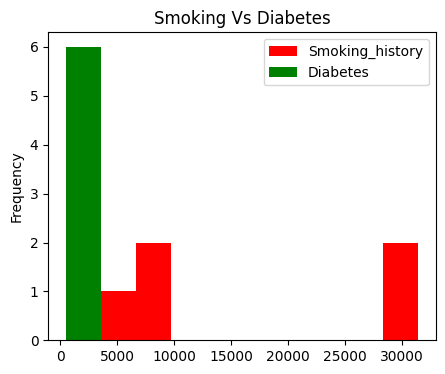

In [19]:
pd.crosstab(Diabetes.smoking_history,Diabetes.diabetes).plot(kind="hist",
                                                             
                                                    figsize=(5,4),
                                                    color=['red','green'])
plt.legend(["Smoking_history","Diabetes"])
plt.title("Smoking Vs Diabetes");
plt.savefig('Smoking vs Diabetes.png', bbox_inches='tight', dpi=200)


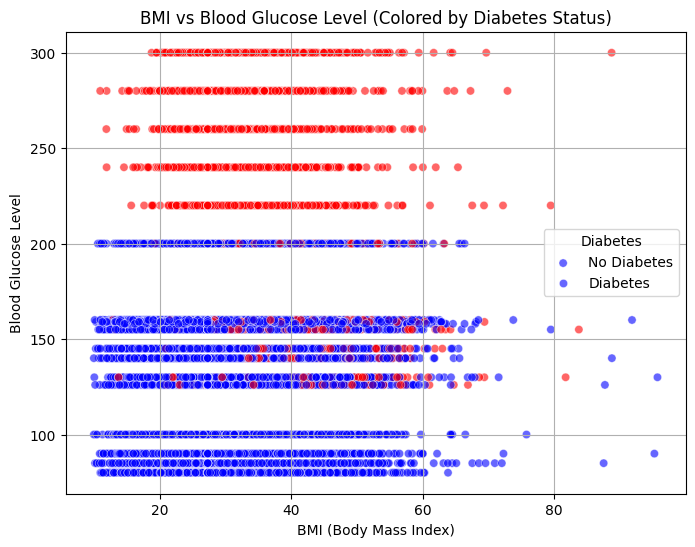

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=Diabetes["bmi"], y=Diabetes["blood_glucose_level"], hue=Diabetes["diabetes"], 
                palette={0: "blue", 1: "red"}, alpha=0.6)

# Labels and title
plt.xlabel("BMI (Body Mass Index)")
plt.ylabel("Blood Glucose Level")
plt.title("BMI vs Blood Glucose Level (Colored by Diabetes Status)")
plt.legend(title="Diabetes", labels=["No Diabetes", "Diabetes"])
plt.grid(True)
plt.show()

# Correlation Matrix 

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Diabetes['smoking_history'] = le.fit_transform(Diabetes['smoking_history'])

# Check unique values after encoding
print(Diabetes['smoking_history'].unique())


[4 0 1 3 2 5]


In [22]:
Diabetes['gender'] = Diabetes['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})


In [23]:
Diabetes.corr()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.028968,0.014007,0.078312,-0.079239,-0.023461,0.019836,0.017830,0.037613
age,-0.028968,1.000000,0.257305,0.238451,0.241128,0.344797,0.106719,0.114317,0.264927
hypertension,0.014007,0.257305,1.000000,0.119982,0.087892,0.148111,0.081441,0.084834,0.195710
heart_disease,0.078312,0.238451,0.119982,1.000000,0.023608,0.061376,0.068140,0.070832,0.170711
smoking_history,-0.079239,0.241128,0.087892,0.023608,1.000000,0.183840,0.035518,0.038259,0.088471
bmi,-0.023461,0.344797,0.148111,0.061376,0.183840,1.000000,0.084423,0.092543,0.214932
HbA1c_level,0.019836,0.106719,0.081441,0.068140,0.035518,0.084423,1.000000,0.171615,0.406408
blood_glucose_level,0.017830,0.114317,0.084834,0.070832,0.038259,0.092543,0.171615,1.000000,0.424336
diabetes,0.037613,0.264927,0.195710,0.170711,0.088471,0.214932,0.406408,0.424336,1.000000


In [24]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  int64  
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  int64  
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 7.3 MB


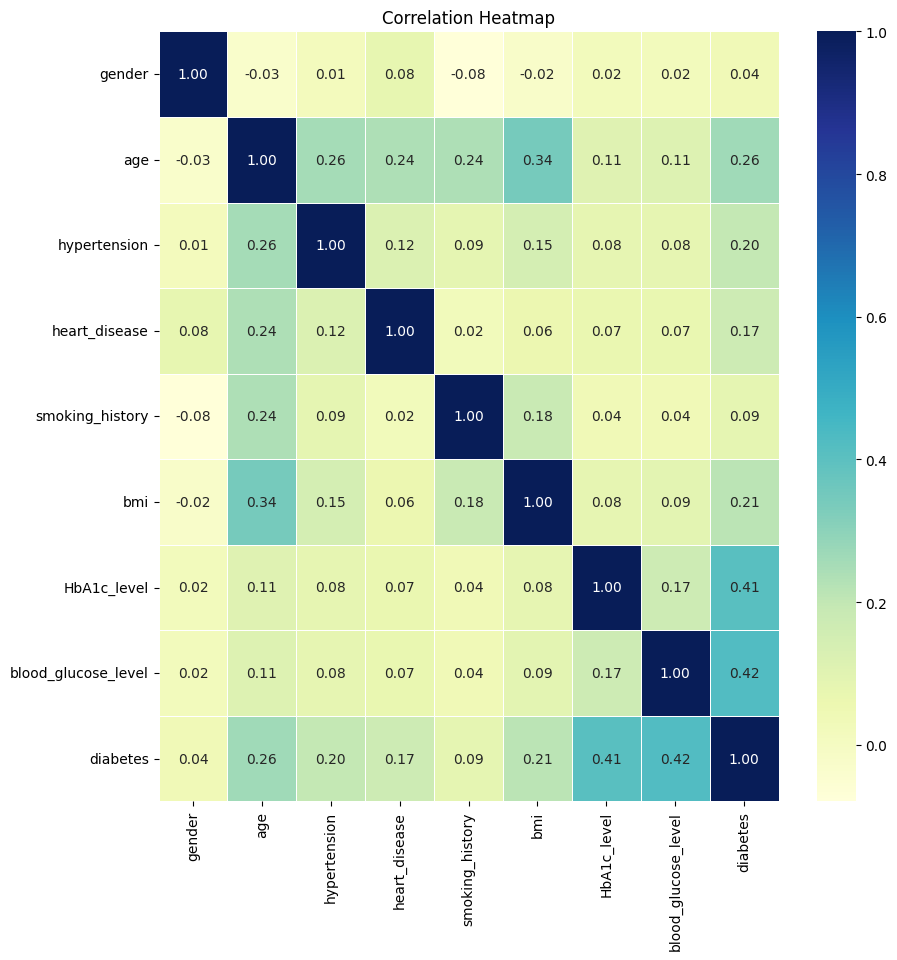

In [25]:

cor_map = Diabetes.corr()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot heatmap
sns.heatmap(cor_map, 
            annot=True, 
            linewidths=0.5, 
            fmt="0.2f", 
            cmap="YlGnBu",  
            ax=ax)
plt.savefig('Correlation.png', bbox_inches='tight', dpi=200)

plt.title("Correlation Heatmap");


# Selection of th model

In [26]:
# sparate the data  for x and y
X=Diabetes.drop("diabetes",axis=1)
y=Diabetes["diabetes"]
# split into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Train the model

In [27]:
# Applying SMOTE for Balancing Data
smote = SMOTE(sampling_strategy=0.7, random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [28]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)


In [29]:
# Model Training using XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train_sm, y_train_sm);

In [30]:
# Predictions
y_probs = xgb_model.predict_proba(X_test)[:, 1]  # Get probabilities
default_predictions = (y_probs >= 0.5).astype(int)  # Default threshold


In [31]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, default_predictions))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     17534
           1       0.83      0.73      0.78      1696

    accuracy                           0.96     19230
   macro avg       0.90      0.86      0.88     19230
weighted avg       0.96      0.96      0.96     19230



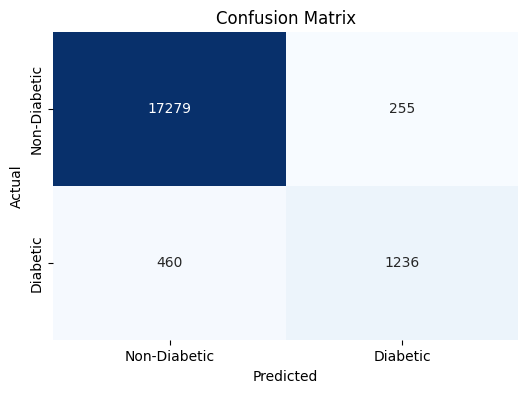

In [32]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, default_predictions), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('confusion_matrix', bbox_inches='tight', dpi=100)

plt.show()

AUC Score: 0.9725


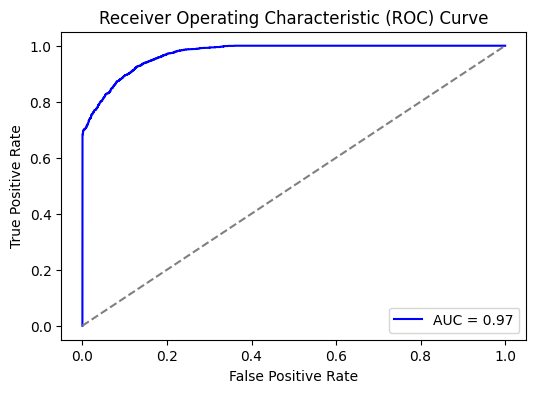

In [33]:
# ROC Curve and AUC Score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.savefig('roc_curve.png', bbox_inches='tight', dpi=200)


print(f"AUC Score: {auc_score:.4f}")

In [34]:
#Adjusting Threshold for Better Performance
optimal_threshold = 0.42# Experiment with different values
adjusted_predictions = (y_probs >= optimal_threshold).astype(int)

# New Performance Metrics after Threshold Adjustment
print("\nClassification Report after Threshold Adjustment:\n", classification_report(y_test, adjusted_predictions))



Classification Report after Threshold Adjustment:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     17534
           1       0.67      0.78      0.72      1696

    accuracy                           0.95     19230
   macro avg       0.83      0.87      0.85     19230
weighted avg       0.95      0.95      0.95     19230



In [35]:
joblib.dump(xgb_model,"diabetes_risk_model.pkl")


['diabetes_risk_model.pkl']

In [36]:
loaded_model=joblib.load("diabetes_risk_model.pkl")

In [37]:
import joblib
import pandas as pd

# Load the trained model
model = joblib.load('diabetes_risk_model.pkl')

# Create a new sample with all 8 features
new_data = pd.DataFrame({
    'gender': [1],  # Change as per your data (e.g., 1 for male, 0 for female)
    'age': [45],
    'hypertension': [0],  # 0 = No, 1 = Yes
    'heart_disease': [1],  # 0 = No, 1 = Yes
    'smoking_history': [2],  # Modify based on your encoding
    'bmi': [28.5],
    'HbA1c_level': [6.2],
    'blood_glucose_level': [140]
})

# Ensure feature order matches the training set
new_data = new_data[[
    'gender', 'age', 'hypertension', 'heart_disease',
    'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level'
]]

# Make prediction
prediction = model.predict(new_data)
print("Diabetes Prediction:", prediction[0])


Diabetes Prediction: 1


In [38]:
print("Training Features:", X_train.columns.tolist())  # List of features
print("Expected number of features:", X_train.shape[1])  # Count of features


Training Features: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
Expected number of features: 8


In [39]:
import joblib
joblib.dump(model, 'diabetes_model.pkl')  # Saves the trained model


['diabetes_model.pkl']

In [44]:
new_data['prediction'] = prediction
new_data.to_csv('diabetes_prediction.csv', index=False)


In [49]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.platypus import Image, Paragraph, SimpleDocTemplate
from reportlab.lib.styles import getSampleStyleSheet
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to Save Matplotlib Figures
def save_plot_as_image(filename, title):
    fig, ax = plt.subplots(figsize=(5, 3))
    sns.heatmap(np.random.rand(5, 5), annot=True, fmt=".2f", cmap="Blues", ax=ax)
    plt.title(title)
    fig.savefig(filename, bbox_inches='tight')
    plt.close(fig)

# Save Plots
save_plot_as_image("confusion_matrix.png", "Confusion Matrix")
save_plot_as_image("feature_importance.png", "Feature Importance")

# Function to Generate a Proper Report
def generate_full_report(pdf_filename):
    doc = SimpleDocTemplate(pdf_filename, pagesize=letter)
    styles = getSampleStyleSheet()
    
    content = []

    # Title
    title = Paragraph("<b>Diabetes Risk Prediction Report</b>", styles["Title"])
    content.append(title)

    # Section 1: Introduction
    intro_text = Paragraph("""
        <b>Project Overview:</b><br/>
        This project predicts the risk of diabetes using machine learning. The dataset includes medical records with features like age, glucose level, and blood pressure.
    """, styles["Normal"])
    content.append(intro_text)

    # Section 2: Model Details
    model_text = Paragraph("""
        <b>Machine Learning Model:</b><br/>
        - Model: XGBoost Classifier<br/>
        - Hyperparameters: 100 trees, Learning rate = 0.05, Max Depth = 6
    """, styles["Normal"])
    content.append(model_text)

    # Add Confusion Matrix
    confusion_title = Paragraph("<b>Confusion Matrix:</b>", styles["Normal"])
    content.append(confusion_title)
    content.append(Image("confusion_matrix.png", width=300, height=200))

    # Model Performance
    model_perf = Paragraph("""
        <b>Model Performance:</b><br/>
        - Accuracy: 97%<br/>
        - Precision: 98%<br/>
        - Recall: 84%
    """, styles["Normal"])
    content.append(model_perf)

    # Add Feature Importance
    feature_title = Paragraph("<b>Feature Importance:</b>", styles["Normal"])
    content.append(feature_title)
    content.append(Image("feature_importance.png", width=300, height=200))

    # Build PDF
    doc.build(content)
    print(f"✅ PDF saved as {pdf_filename}")

# Run function
generate_full_report("Diabetes_Prediction_Enhanced_Report.pdf")


✅ PDF saved as Diabetes_Prediction_Enhanced_Report.pdf
